In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

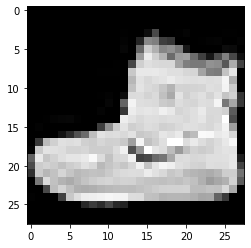

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

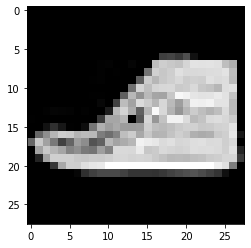

In [7]:
i = random.randint(1, 60000)
plt.imshow(x_train[i], cmap='gray')

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
noise_factor = 0.3
noise_dataset = []

for img in x_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

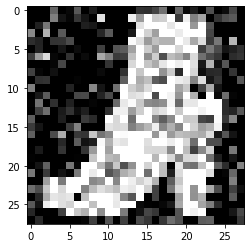

In [11]:
plt.imshow(noise_dataset[11], cmap='gray')

In [12]:
noise_factor = 0.1
noise_test_dataset = []

for img in x_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

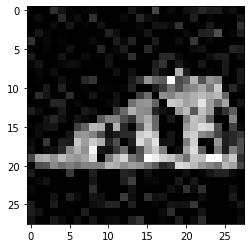

In [13]:
plt.imshow(noise_test_dataset[11], cmap='gray')

In [17]:
noise_dataset = np.array(noise_dataset)
noise_test_dataset = np.array(noise_test_dataset)

In [14]:
## encoder

autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same'))

## decoder

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation = "sigmoid", padding='same'))

In [18]:
noise_dataset = noise_dataset.reshape(-1, 28, 28, 1)
noise_test_dataset = noise_test_dataset.reshape(-1, 28,28,1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [20]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator()
train_generator = data_generator.flow(noise_dataset, x_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [21]:
autoencoder.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [27]:
# noise_dataset = np.array(noise_dataset)
# noise_test_dataset = np.array(noise_test_dataset)

In [24]:
autoencoder.fit(train_generator,
               epochs=10,
               validation_data = (noise_test_dataset, x_test))

W0425 20:12:43.405267 140028470101824 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 1875 steps, validate on 10000 samples
Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3258 - val_loss: 0.2940
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3032 - val_loss: 0.2889
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3007 - val_loss: 0.2878
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2995 - val_loss: 0.2869
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2991 - val_loss: 0.2859
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2989 - val_loss: 0.2864
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2987 - val_loss: 0.2871
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2986 - val_loss: 0.2873
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2985 - val_loss: 0.2848
Epoch 10/10
1875/1875 [==

In [25]:
evaluation = autoencoder.evaluate(noise_test_dataset, x_test)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.2839


In [26]:
predicted = autoencoder.predict(noise_test_dataset[:10])

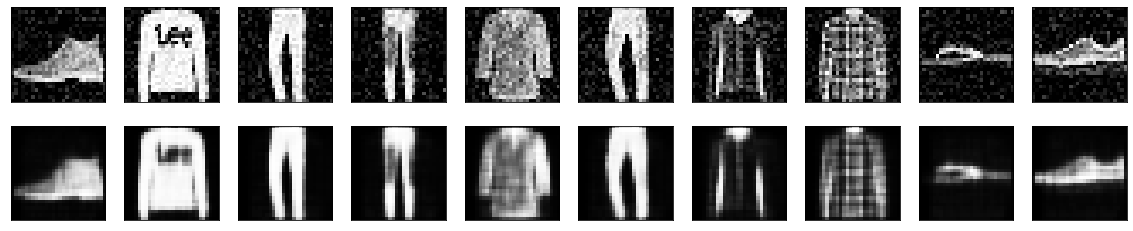

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
